In [1]:
from keras.datasets import imdb

Using TensorFlow backend.


In [3]:
# num_words는 훈련 데이터에서 가장 자주 나타나는 단어 1만 개만 사용하겠다는 의미
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words =10000) 

17465344/17464789 [==============================] - 91s 5us/step


In [6]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [7]:
train_labels[0]

1

In [8]:
# 가장 자주 등장하는 단어 1만 개로 제한했기 때문에 단어 인덱스는 9,999를 넘지 않는다
max([max(sequence) for sequence in train_data])

9999

In [9]:
# 데이터를 영어 단어로 바꾸기
word_index = imdb.get_word_index() # word_index는 단어와 정수 인덱스를 매핑한 딕셔너리
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) # 정수 인덱스와 단어를 매핑하도록 뒤집는다
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]]) # 리뷰를 디코딩 한다. 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺀다

1646592/1641221 [==============================] - 9s 6us/step


In [10]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### 데이터 준비

신경망에 숫자 리스트를 주입할 수는 없다. 리스트를 텐서로 바꾸는 두가지 방법

- 같은 길이가 되도록 리스트에 패딩(padding)을 추가하고 (samples, sequence_length) 크기의 정수 텐서로 변환한다. 그다음 이 정수 텐서를 다룰 수 있는 층을 신경망의 첫 번째층으로 사용한다.
- 리스트를 원-핫 인코딩(one-hot encoding)하여 0과 1의 벡터로 변환한다. 예를 들어 시퀀스 [3, 5]를 인덱스 3과 5의 위치는 1이고 그 외는 모두 0인 10,000차원의 벡터로 각각 변환한다. 그다음 부동 소수 벡터 데이터를 다룰 수 있는 Dense층을 신경망의 첫 번째 층으로 사용.

In [16]:
# 정수 시퀀스를 이진 행렬로 인코딩
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [17]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [18]:
x_test

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [19]:
# 레이블을 벡터로
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [22]:
y_train[0]

1.0

In [23]:
train_labels[0]

1

In [24]:
# 모델 정의하기
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [25]:
# 모델 컴파일하기
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
# 훈련 검증
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [27]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 194us/step - loss: 0.5087 - acc: 0.7811 - val_loss: 0.3801 - val_acc: 0.8688
Epoch 2/20
15000/15000 [==============================] - 2s 120us/step - loss: 0.3007 - acc: 0.9052 - val_loss: 0.3006 - val_acc: 0.8902
Epoch 3/20
15000/15000 [==============================] - 2s 129us/step - loss: 0.2181 - acc: 0.9280 - val_loss: 0.3084 - val_acc: 0.8716
Epoch 4/20
15000/15000 [==============================] - 2s 120us/step - loss: 0.1752 - acc: 0.9432 - val_loss: 0.2838 - val_acc: 0.8838
Epoch 5/20
15000/15000 [==============================] - 2s 118us/step - loss: 0.1427 - acc: 0.9541 - val_loss: 0.2847 - val_acc: 0.8864
Epoch 6/20
15000/15000 [==============================] - 2s 120us/step - loss: 0.1151 - acc: 0.9653 - val_loss: 0.3164 - val_acc: 0.8776
Epoch 7/20
15000/15000 [==============================] - 2s 116us/step - loss: 0.0982 - acc: 0.9705 - val_loss: 0.3125 - 

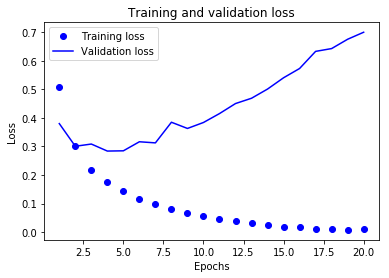

In [29]:
import matplotlib.pyplot as plt

# 훈련과 검증 손실
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

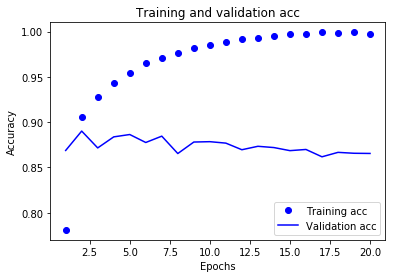

In [30]:
# 훈련과 검증 정확도
plt.clf() # 그래프 초기화
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

훈련 손실은 에포크마다 감소하고 훈련정확도는 에포크마다 증가한다. 하지만 검증 손실과 정확도는 처음 보는 데이터에 잘 작동하지 않음을 알 수 있다.  이를 과대적합(overfitting)되었다고 한다. 즉, 훈련데이터 이외의 데이터에는 일반화되지 못했다.

이런 경우 과대적합을 방지하기 위해서 세 번째 에포크 이후에 훈련을 중지할 수 있다. (위 그래프에서 4번째 에포크에서 그래프가 역전되었다고 하는데.. 내가 보기에는 그 전부터 틀어진게 아닌가 싶은데, 쨌든)

In [33]:
# 다시 훈련
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))
# model.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512)
# results = model.evaluate(x_test, y_test)
# print(results)

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 3s 174us/step - loss: 0.5158 - acc: 0.7897 - val_loss: 0.3886 - val_acc: 0.8709
Epoch 2/4
15000/15000 [==============================] - 2s 161us/step - loss: 0.3103 - acc: 0.8992 - val_loss: 0.3208 - val_acc: 0.8733
Epoch 3/4
15000/15000 [==============================] - 2s 165us/step - loss: 0.2239 - acc: 0.9287 - val_loss: 0.3063 - val_acc: 0.8749
Epoch 4/4
15000/15000 [==============================] - 2s 166us/step - loss: 0.1795 - acc: 0.9428 - val_loss: 0.2763 - val_acc: 0.8894


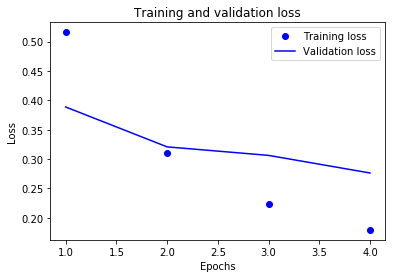

In [34]:
# 훈련과 검증 손실
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

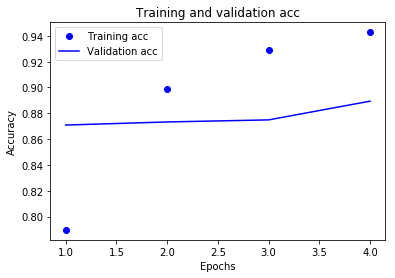

In [35]:
plt.clf() # 그래프 초기화
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [36]:
print(history_dict)

{'val_loss': [0.38864973616600035, 0.3207854281425476, 0.3063120756149292, 0.2763484622001648], 'val_acc': [0.8709, 0.8733000002861023, 0.8749000001907349, 0.8894000001907348], 'loss': [0.5157688323815663, 0.3103124508062998, 0.22387903792063396, 0.1795185485124588], 'acc': [0.7896666665712992, 0.8992000000953674, 0.9286666667620341, 0.942800000222524]}
